<a href="https://colab.research.google.com/github/noahrychener/DSF-DCBP-NR/blob/main/DSF_MD%20Project%20-%20Group%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSF FS2022 - Project Molecular Dynamics - Group 7
#### *Luca Sassara - 19-114-503 / Noah Rychener - 19-116-532*
The investigation and analysis of proteins in the field of molecular dynamics is achieved through a multitude of computational methods and programs. In the following project, the 1GNM HIV-1 PROTEASE MUTANT (https://www.rcsb.org/structure/1GNM) will be investigated. The investigated protein structure was deposited in https://www.rcsb.org/ and was freely available.
The project will comprise the understanding of Linux operating systems, adjusting the protein file through GROMACS and running different computing systems with different clusters.


#1. General Setup
##1.1 PuTTY
Much of work on Linux is performed in a secure fish shell (ssh). PuTTY allows to access remote machines. In the following project, PuTTY, Microsoft Shell and MobaXTerm were used to access and operate on the Ubelix servers. 
To utilise ssh from a windows computer PuTTY is required. \
https://www.putty.org/ - Download

##1.2 MobaXTerm
Is a free Xserver and tabbed ssh client for Windows. Its advantages include an easy interface and the integration of terminal and file managing system into one. \
https://mobaxterm.mobatek.net/download.html - Download MobaXTerm

##1.3 FileZilla 
Transferring and compying remote data is best achieved through FileZilla. The outputs of our codes were easily accessible and easy to download, if linked to our directory. Username, Password and Port 22 were needed. \
https://filezilla-project.org/ - Download

## 1.4 Ubelix
The HPC cluster Ubelix of the University of Bern requires a registration step. 
https://hpc-unibe-ch.github.io/getting-Started/account.html - Registration
It is important to follow the rules conduct, as it is an open resource. The first steps and how to navigate the systems can be found on the official website. \
https://hpc-unibe-ch.github.io/quick-start.html - Quick Start

## 1.5 GROMACS / Chemzilla
Molecular dynamics is an important method for investigating proteins. GROMACS is one of the most advanced and most documented packages for the task. Working remotely using Chemzilla allowed to use GROMACS without installation, as it was preinstalled on Chemizilla and Ubelix. The protein was subsequently prepared in Chemzilla according to the following Tutorial. \
http://www.mdtutorials.com/gmx/lysozyme/01_pdb2gmx.html - Gromacs Lysozyme Tutorial


#2. Gromacs - Chemzilla


###2.1. Preparation of the Topology
From the input file '1gnm.pdb-cleaned.pdb' containing the information required to model the protein based on the positions of its individual atoms. The following commands were used to process the cleaned previousely cleaned input file (1gnm.pdb-cleaned.pdb). \
The commands consisted of:

1. pdb2gmx command
2. Choosing the desired force field #15 (OPLS-AA/L) [...]

In [ ]:
# gmx pdb2gmx -f 1gnm.pdb-cleaned.pdb -o 1gnm.pdb-processed.gro -water 
# 15

###2.2. Generating Topology
#### Topology
Modeling of a simple aqueous system to stimulate the protein given to us. For this to fuinction smoothly, the characteristic parameteres of the system have to be set up accordingly. The unit cell in which the MD simulation takes place is defined as a cubic box (-bt cubic). This is achived using the 'editconf' command. The protein is therefore placed in the centre of the box (-c), at least 1.0 [nm] from the edge of our unit cell (-d 1.0). Said 
distance between the edge of the unit cell and the protein guarantees that no proteins overlap in the periodic translation of the unit cell consisting our protein. Necessary information on the topology of the protein are by default always safed into the 'topol.top' file. It allows to define the whereabouts of the molecules building the protein. This includes nonbounded parameters such as the atom types and their charges, as well as bounded parameters such as the bonds and the angles involved.

In [ ]:
# gmx editconf -f 1gnm.pdb-processed.gro -o 1gnm.pdb-newbox.gro -c -d 1.0 -bt cubic

### 2.3. Solvation
The previousely defined cubic unit cell containing the protein is now solvated with the solvent system of our choice. Due to hydrophobic forces being one of the major contributors responsible for the correct folding, the solvent system of our choice is water. In this approach, 'spc216.gro' is the model of our choice.


In [ ]:
# gmx solvate -cp 1gnm.pdb-newbox.gro -cs spc216.gro -o 1gnm.pdb-solv.gro -p topol.top

The 'solvate' command traces the amount of water [mol] molecules added to the unit cell. The resulting changes to the topology are written accordingly into a file called the 'topo.top'.

In [ ]:
# [ molecules ]
# ; Compound  #mols
# Protein_A       1 
# SOL         10832 

### 2.4. Adding Ions
The addition of ions is performed to offset the charge of the protein, yielding the required net charge of zero. This task is performed using the tool called 'genion'. It generates ions out of water molecules if desired at specific locations. Therefore, an input file has to be run, defining the terms, so that potential ions can be added where required.

**Generating the '.tpr' file.**

In [ ]:
# gmx grompp -f ions.mdp -c 1gnm.pdb-solv.gro -p topol.top -o ions.tpr

**The** atomic-level description of our system in the form of the 'ions.tpr' file (-s; *structure state file*), generated in the previous step, can now be fed into genion. In a second step, group '13' is chosen to embed ions within the unit cell without replacing parts of our 1gnm protein. As an output this results in a '.gro' file (-o).

In [ ]:
# gmx genion -s ions.tpr -o 1gnm.pdb-sol-ions.gro -p topol.top -pname NA -nname CL -neutral
# 13

The output of the comand used previously, updated the [ molecules ] directory of the 'topol.top' file. As shown below, the two Cl- anions were added to the unit cell.

In [ ]:
# From 'tipol.top'
# [ molecules ]
# ; Compound      #mols
# Protein_chain_A   1
# Protein_chain_B   1
# SOL         16061
# CL          2
# Cl          2
# Cl          2
# SOL         16067

### 2.5. Energy Minimization
Relaxing the structure through energy minimization (EM) is crutial to prevent potential static clashes or inappropriate geometric conformations of the protein within the solvated, electroneutral unitcell. Much like in the previous step, where the addion of anions to the unit cell was performed, a binary input in the form of an input parameter file ('minim.mdp') is required.


In [ ]:
# gmx grompp -f minim.mdp -c 1gnm.pdb-sol-ions.gro -p topol.top -o em.tpr

The energy minimization (EM) is then started with the following 'mdrun' command.

In [ ]:
# gmx mdrun -v -deffnm em

The output from said EM comprises of four files: \
> 'em.log' = ASCII-text log file of the EM process, \ 
'em.edr' = Binary energy file, \
'em.trr' = Binary full-precision trajectory, \
'em.gro' = Energy-minimized structure.

Additionally, information about the EM process in the form of 'lowest energy coordinates' is shown as output. These information can be used to determine whether the EM run was successful: \
> e.g.: The **potential energy** should therefore be negativ and in the magnitude of 10⁵-10⁶ [kJ/mol] (aqueous system).\
[...]

In [ ]:
# Output
# Steepest Descents converged to Fmax < 1000 in 807 steps
# Potential Energy  = -8.7952925e+05
# Maximum force     =  9.8994794e+02 on atom 459
# Norm of force     =  2.1779678e+01

Using the GROMACS energy module and the 'em.edr' file, the EM process can be analysed further if it is required to do so. The responsible code is shown bellow. The selection of '10 0' after running the initial command, achives to write a file called 'potential.xvg', containing information on the average potential energy as a function of number of EM steps.

In [ ]:
# gmx energy -f em.edr -o potential.xvg
#10 0


The following plot, showing the potential curve of the energy minimization over time was generated in the chemzilla terminal using the following command.

In [ ]:
# xmgrace potential.xvg

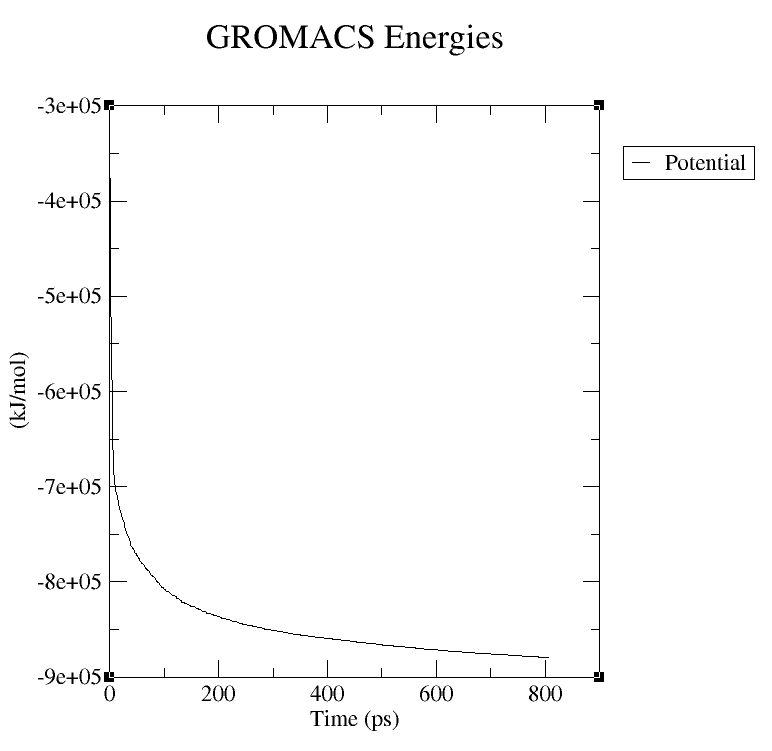


### 2.6. Equilibration
#### Part I - NVT Equilibration

In [ ]:
# gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr
# gmx mdrun -deffnm nvt

Analysis of the temperature ('16 0') with the same methods used to write the 'potential.xvg' file.

In [ ]:
# gmx energy -f nvt.edr -o temperature.xvg
# 16 0

Output besides the information shown bellow is a file called 'temperature.xvg' containing graphical information on the equilibration process regarding the temperature. The corresponding plot is together with the command required to create seid plot is shown bellow.

In [ ]:
# Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
# All statistics are over 501 points

# Energy                      Average   Err.Est.       RMSD  Tot-Drift
# -------------------------------------------------------------------------------
# Temperature                 299.812       0.19    2.76499    1.24828  (K)


In [ ]:
# xmgrace temperature.xvg

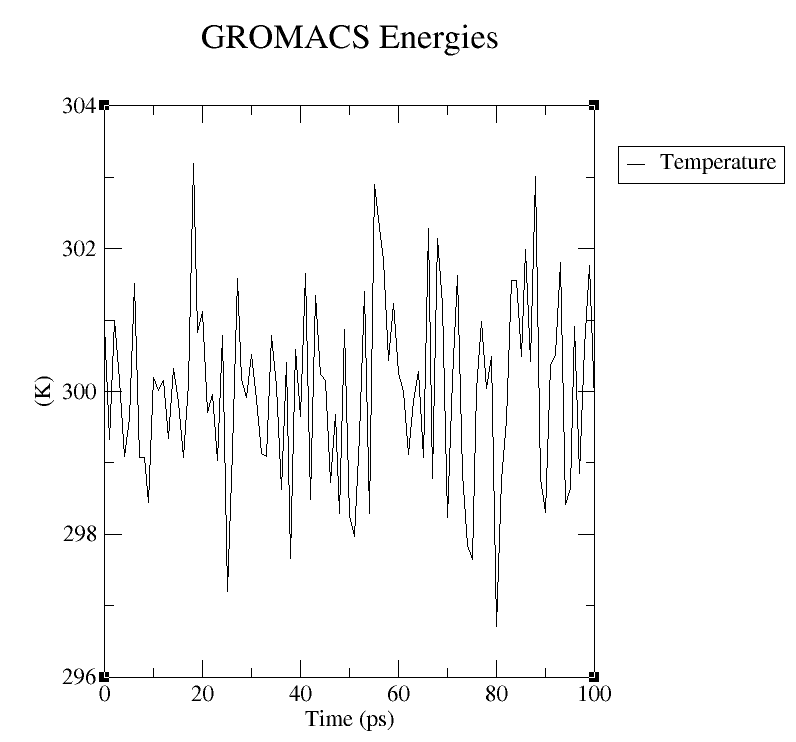

####Part II - NPT Equilibrium
In the next lines of code, the 'nvt.gro' file was created, saved and thereafter the seccond equilibration run was initiated.

In [ ]:
# gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr
# gmx mdrun -deffnm npt

The output of said NPT equilibration writes the final coordinates required for the later MD production runs, which will be performed on Ubelix rather than Chemzilla.

In [ ]:
# Writing final coordinates.

#              Core t (s)   Wall t (s)        (%)
#      Time:     6112.094      509.341     1200.0
#                (ns/day)    (hour/ns)
# Performance:     16.963        1.415


The resulting optimization for the system regarding the pressure yielded the following output and similarly as shown previousely fro the temperature and the potential, both a 'pressure.xvg' and a 'density.xvg' file were generated. The graphical representation of which were plotted with the generic 'xmgrace' commands.

In [ ]:
# xmgrace pressure.xvg
# xmgrace density.xvg

In [ ]:
# Energy                      Average   Err.Est.       RMSD  Tot-Drift
# -------------------------------------------------------------------------------
# Pressure                   0.785252        3.9     127.59    18.8362  (bar)


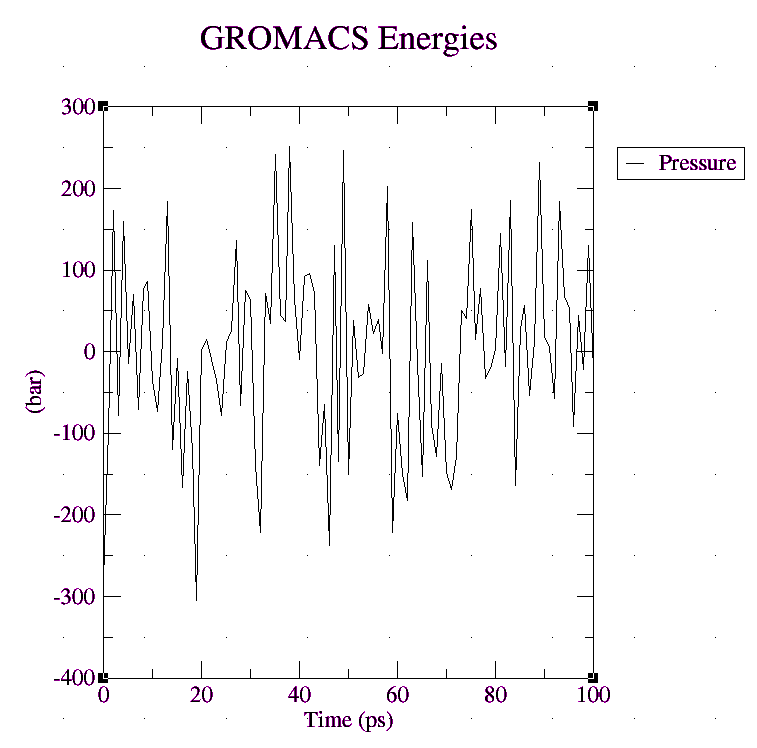

In [ ]:
# Energy                      Average   Err.Est.       RMSD  Tot-Drift
# -------------------------------------------------------------------------------
# Density                     1015.64       0.16    2.09722   0.997718  (kg/m^3)


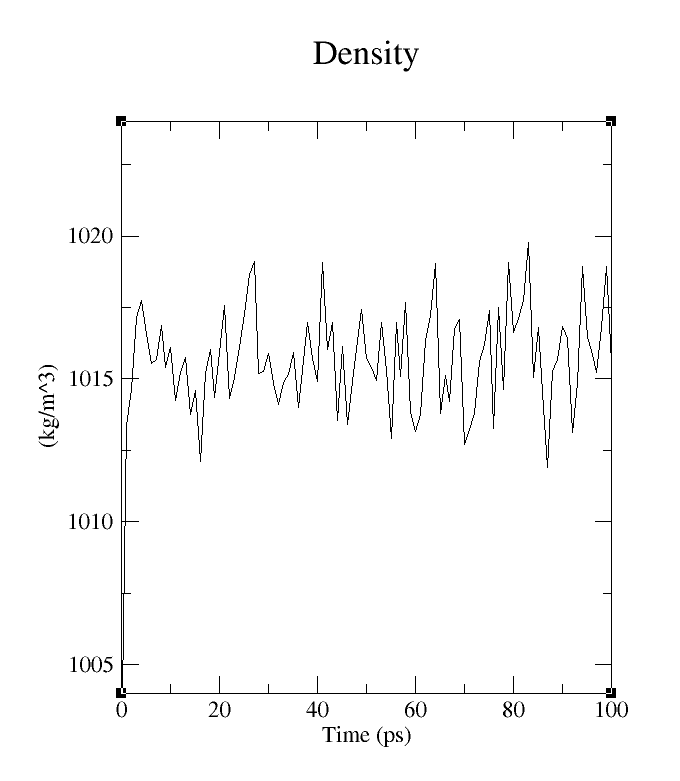

# 3. Hello World - Ubelix
With the setup described previousely, the following commands were used to successfully run a phyton script on Ubelix. The simple phyton script was packed up into a shell file ('MDRun3.sh') to allow for an easy submission into the cluster ('sbatch MDRun3.sh').

In [ ]:
# vi MDRun3.sh
# ls -l MDRun3.sh
# sbatch MDRun3.sh
# squeue --job=25492375

Upon opening the bash shell script file 'MDRun3.sh' with through 'vi MDRun3.sh', the following commands could be coded within said '.sh' file. Due to the very low demand for hardware, the time was set to 30 [s]. Additionally, phyton had to be loaded in as a module and the prepared 'HelloWorldDSF.py' input file had to be present in the current working directory.



In [ ]:
# #!/bin/bash
# #SBATCH --time=00:00:30
# #SBATCH --mem-per-cpu=1G

# module load Phyton
# srun phyton3 HelloWorldDSF.py

Said 'HelloWorldDSF.py' **input file** itself consisted only of two lines: 
> the first line being needed to write the output to a dedicated '.txt' file (being safed into the current working directory.

> the seccond line of code to print the message which will be written as an output ('HelloWorldDSF.txt).


In [ ]:
# with open('Hello World DSF', 'w') as file:
#   file.write('Hello World! Greetings from group 7.')

A picture from output safed as 'HelloWorldDSF.txt':

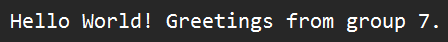

#4. MD Production - Ubelix


With the relevant files ('md.mdp', 'npt.gro', 'npt.cpt' and 'topol.top') transfered from the Chemzilla directory to the current working directory in Ubelix, the MD production runs were set up similarly to the previous 'HelloWorld' job. Therefore a new shell file ('MDRun.sh') was opened to accomodate the commands required for the submission onto the cluster ('#SBATCH'), the commands required to load the required modules (most importantly gromacs) and finally, the gromacs commands to initiate the MD run.
To test the principle, the time requirement was set to only five minutes, so that the job was performed swiftly.

### 4.1. CPU based MD run

In [ ]:
# vi MDRun5.sh

# #!/bin/bash
# #SBATCH --time=00:05:00
# #SBATCH --mem-per-cpu=8G

# module purge
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr
# gmx mdrun -deffnm md_0_1

# sbatch MDRun5.sh

The test MD run whichm was successfully performed on CPUs of the Ubelix cluster yielded the following output files, and safed them into the currend working directory. \
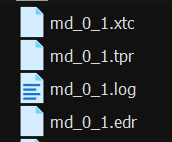

### 4.2. GPU based MD run
The code required for the GPU based run mainly differentiates itself from the CPU based MD run regarding the '#SBATCH --partition=gpu' command, stating that the task should be performed on GBUs. This run strangely generated no output. The coresponding 'slurm-25555897.out' file had the following contents.
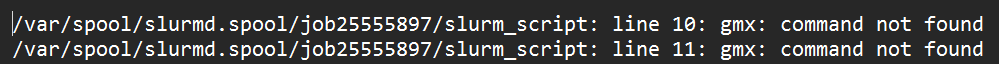\
Meaning, that the MD test run could not be performed on GPUs.

In [ ]:
# vi MDRun.sh

# #!/bin/bash
# #SBATCH --ntasks=1
# #SBATCH --cpus-per-task=1
# #SBATCH --mem-per-cpu=16GB
# #SBATCH --partition=gpu
# #SBATCH --time=00:05:00

# module purge
# module load GROMACS/2020-foss-2019b
# gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr
# gmx mdrun -deffnm md_0_1 -nb gpu

# sbatch MDRun.sh

Due to struggles getting the submissions to work properly, the production runs could not be performed over a longer period of time. Therefore it is only meant to be a proof of principle, as more work heavy runs could be submitted based on the experiences gathered through trial and error.

#5. Analysis - Chemzilla and PyMol


Finally, the analysis of the data aquired from the MD production runs was ought to be analysed with in Chemzilla. With the output files attained in the CPU MD test run, the following gromacs command was used to start the analysis. After prompting to select a group for centering, the protein ('1') was choosen to be in the midpoint. Thereafter, the 'group for output' was selected to be the system ('0').

In [ ]:
# gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -center
# 1
# 0


Eventhough, in the short CPU MD test run created the desired output files, it seems that there were no legible atom coordinates with which gromacs could have continued the analysis. The following error message appeared:\
\
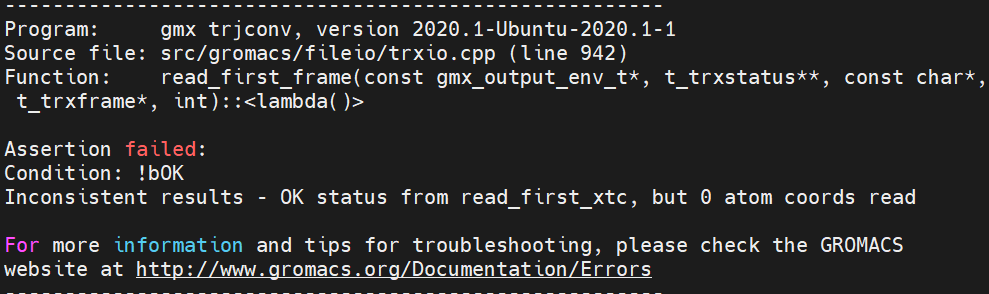

As a consequence, this analysis came to a halt prematurely.

#6. Conclusion
Despite the troubles we engountered working with gromacs and in regards to working with Ubelix. The time spend for this project was time well spend, as using the different tools and working on various interfaces deffinitly increases the understanding and conections respectively differences between the various systems. The learning curve was definitely quite steep, but thanks to the well documented tutorials, the task at hand was more or less comprehensible. The figure bellow shows how the protein would pressumabely would look like, if the analysis was successful. It was plotted using PyMol with the structural data provided on the 'rscb' protein database.

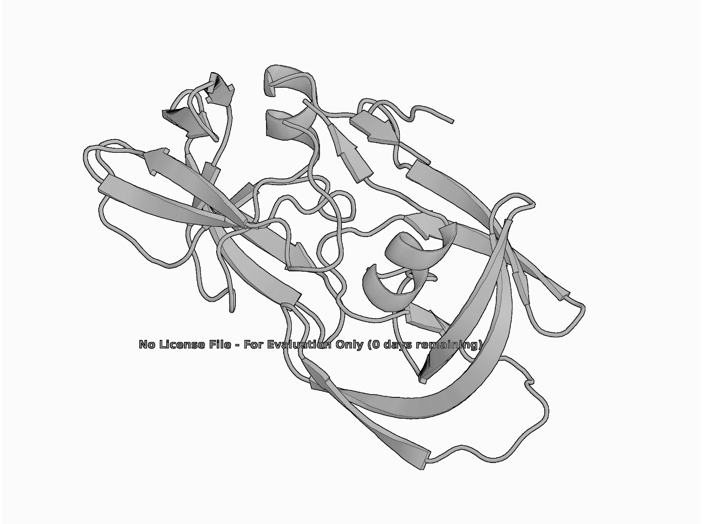